<a href="https://colab.research.google.com/github/rajput-t/deep_learning/blob/main/sine_wave_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sine Wave Forecasting with LSTM
The sine function, denoted as $\sin(x)$, is a fundamental trigonometric function that describes the relationship between an angle of a right-angled triangle and the ratio of the length of the side opposite the angle to the length of the hypotenuse. In a broader context, it is a periodic function that oscillates between -1 and 1.

Here, the sine function is used to generate a synthetic dataset for forecasting. The code `data = np.sin(timesteps)` creates a sine wave where `timesteps` is a sequence of values. This sine wave serves as a simple yet effective example of time series data that exhibits seasonality and trend, making it suitable for demonstrating the capabilities of an LSTM model in capturing sequential patterns and making predictions. The periodic nature of the sine wave allows us to evaluate how well the LSTM can learn and forecast repeating patterns.

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## Generating and normalizing Sine Wave Dataset

In [2]:
timesteps = np.linspace(0, 100, 1000)
data = np.sin(timesteps)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

def create_dataset(data, window_size=50):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 50
X, y = create_dataset(data_scaled, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

## Build LSTM Model
LSTMs (Long Short-Term Memory networks) are a type of recurrent neural network (RNN) that are particularly good at processing sequences of data, like time series or natural language. Unlike traditional RNNs, LSTMs have a special internal structure called a "cell state" and several "gates" (input gate, forget gate, output gate). These gates control the flow of information into and out of the cell state, allowing LSTMs to remember important information over long periods and forget irrelevant information.

In [3]:
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=10, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.1343
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0277
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0057
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.4258e-04
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.0920e-04
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.8013e-05
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.4634e-05
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.3472e-05
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.2728e-05
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.3068e-05


## Predict and Visualize

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


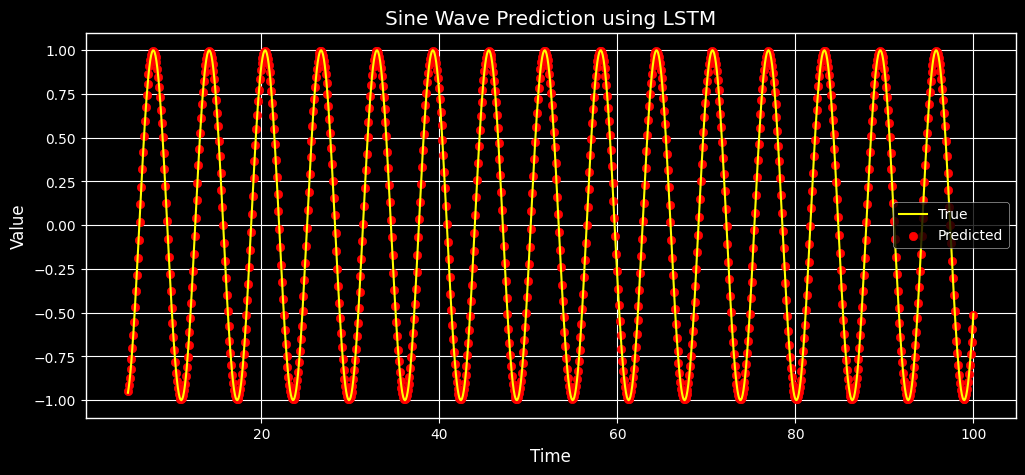

In [9]:
predicted = model.predict(X)
predicted_rescaled = scaler.inverse_transform(predicted)
y_rescaled = scaler.inverse_transform(y)

plt.style.use('dark_background')
plt.figure(figsize=(12, 5))
plt.plot(timesteps[window_size:], y_rescaled, label='True',color='yellow') # true sine wave
plt.scatter(timesteps[window_size:], predicted_rescaled, label='Predicted',color='red') # predicted sine wave
plt.title("Sine Wave Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion
By training the LSTM on a sequence of sine wave values, the model was able to capture the periodic nature of the data and make accurate predictions. This serves as a foundational example for applying LSTMs to more complex time series forecasting tasks.